<a href="https://colab.research.google.com/github/s4nrice/k_nearest_practice/blob/main/tea_coffee_k_nearest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
from google.colab import drive

drive.mount('/content/drive/')

%cd /content/drive/My Drive/мага/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/мага


### **Гиперпараметры**

In [90]:
k_min = 2
k_max = 20
target_feature = 'Пьете утром кофе?'
# 0 < test_selection < 1
test_selection = 0.2

### **Загрузка файла**

In [91]:
df = pd.read_csv('2024-09-23 Sotsiologicheskii opros.csv')

In [92]:
df.head()

,Ваш пол,Возраст,Характер,Как часто вы берете инициативу в свои руки?,Как часто вы пропускаете завтраки?,Сколько спите ночью в среднем,Гипертония,Курите?,Пьете энергетики?,Бывают ли проблемы со сном?,...,Занимаетесь спортом?,Выпиваете алкоголь,Время подъема,Формат работы,Любите сладкое?,Любимое время года?,Что пьют родители,Какие напитки любите,Азартен?,Пьете утром кофе?
0,Женский,22,Холерик,Периодически,Очень часто,10,Нет,Да,Да,Да,...,Нет,Редко,12,Не работаю,Да,Весна,Чай и кофе,Холодные,Нет,True
1,Мужской,22,Холерик,Часто,Очень часто,6,Да,Нет,Нет,Нет,...,Нет,Нет,6,Удаленка,Нет,Весна,Чай,Холодные,Да,False
2,Мужской,22,Меланхолик,Очень редко,Часто,6,Нет,Да,Да,Да,...,Нет,Да,7,Офис,Нет,Весна,Кофе,Холодные,Нет,True
3,Мужской,22,Флегматик,Часто,Очень редко,6,Нет,Да,Нет,Да,...,Нет,Нет,12,Офис,Да,Лето,Чай и кофе,Холодные,Нет,False
4,Мужской,21,Флегматик,Часто,Редко,8,Нет,Нет,Нет,Нет,...,Да,Нет,8,Удаленка,Да,Осень,Чай и кофе,Горячие,Нет,False


### **Преобразование всех значений да/нет в True/False**

In [93]:
column_list = df.columns.tolist()

for column in column_list:
    unique_values = df[column].unique()
    if len(unique_values) == 2:
        df[column] = df[column].replace('Да', True)
        df[column] = df[column].replace('Нет', False)

df.head()

,Ваш пол,Возраст,Характер,Как часто вы берете инициативу в свои руки?,Как часто вы пропускаете завтраки?,Сколько спите ночью в среднем,Гипертония,Курите?,Пьете энергетики?,Бывают ли проблемы со сном?,...,Занимаетесь спортом?,Выпиваете алкоголь,Время подъема,Формат работы,Любите сладкое?,Любимое время года?,Что пьют родители,Какие напитки любите,Азартен?,Пьете утром кофе?
0,Женский,22,Холерик,Периодически,Очень часто,10,-1,1,1,1,...,-1,Редко,12,Не работаю,1,Весна,Чай и кофе,Холодные,-1,True
1,Мужской,22,Холерик,Часто,Очень часто,6,1,-1,-1,-1,...,-1,Нет,6,Удаленка,-1,Весна,Чай,Холодные,1,False
2,Мужской,22,Меланхолик,Очень редко,Часто,6,-1,1,1,1,...,-1,Да,7,Офис,-1,Весна,Кофе,Холодные,-1,True
3,Мужской,22,Флегматик,Часто,Очень редко,6,-1,1,-1,1,...,-1,Нет,12,Офис,1,Лето,Чай и кофе,Холодные,-1,False
4,Мужской,21,Флегматик,Часто,Редко,8,-1,-1,-1,-1,...,1,Нет,8,Удаленка,1,Осень,Чай и кофе,Горячие,-1,False


### **Преобразование категориальных признаков в бинарные**

In [94]:
df = pd.get_dummies(df)
df.head()

,Возраст,Сколько спите ночью в среднем,Гипертония,Курите?,Пьете энергетики?,Бывают ли проблемы со сном?,Повышенная тревожность?,Проблемы с концентрацией,Наличие кофейни возле дома,Любишь ли горькое,...,Формат работы_Удаленка,Любимое время года?_Весна,Любимое время года?_Зима,Любимое время года?_Лето,Любимое время года?_Осень,Что пьют родители_Кофе,Что пьют родители_Чай,Что пьют родители_Чай и кофе,Какие напитки любите_Горячие,Какие напитки любите_Холодные
0,22,10,-1,1,1,1,1,1,1,-1,...,False,True,False,False,False,False,False,True,False,True
1,22,6,1,-1,-1,-1,-1,-1,-1,-1,...,True,True,False,False,False,False,True,False,False,True
2,22,6,-1,1,1,1,1,1,-1,-1,...,False,True,False,False,False,True,False,False,False,True
3,22,6,-1,1,-1,1,1,1,-1,-1,...,False,False,False,True,False,False,False,True,False,True
4,21,8,-1,-1,-1,-1,-1,-1,-1,-1,...,True,False,False,False,True,False,False,True,True,False


### **Разделение на *зависимые* переменные и *независимую* переменную**

In [96]:
X = df.drop(target_feature, axis=1)
y = df[target_feature]

### **Разделение на обучающую и тестовую выборку в соотношении 4/1**

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_selection, random_state=0)

### **Нормализация значений**

In [98]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Обучение**

In [99]:
accuracy_scores = []

for k in range(k_min, k_max + 1):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    accuracy_scores.append(model.score(X_test, y_test))


### **Построение графика**

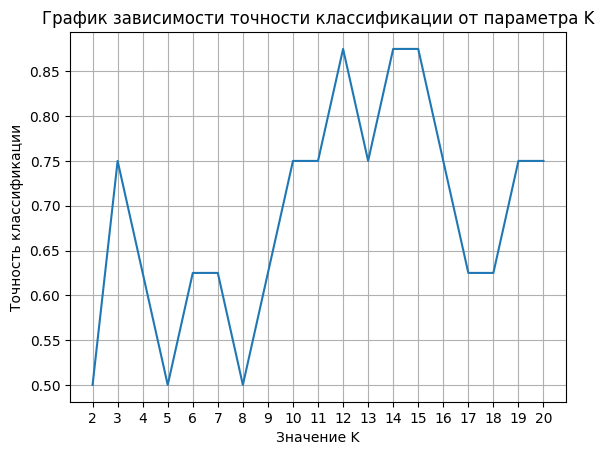

In [100]:
import matplotlib.ticker as ticker

plt.title('График зависимости точности классификации от параметра K')

plt.xlabel('Значение K')
plt.ylabel('Точность классификации')

plt.plot(range(k_min, k_max + 1), accuracy_scores)
plt.xticks(range(k_min, k_max + 1))
plt.grid(True)

plt.show()

### **Матрица ошибок для k=12, при котором точность наивысшая**

In [101]:
max_accuracy = max(accuracy_scores)
k = accuracy_scores.index(max_accuracy) + k_min

# обучение самой удачной модели
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(f'{k=}\n\n{max_accuracy=}\n\n{confusion_matrix(y_test, predictions)}')

k=12

max_accuracy=0.875

[[5 1]
 [0 2]]



Матрица ошибок имеет конфигурацию:

TN FP

FN TP

Где Positive - это означает что человек любит пить утром кофе, а Negative - чай

### **Построения графика корреляции для того, чтобы определить важность каждого из определенных признаков**

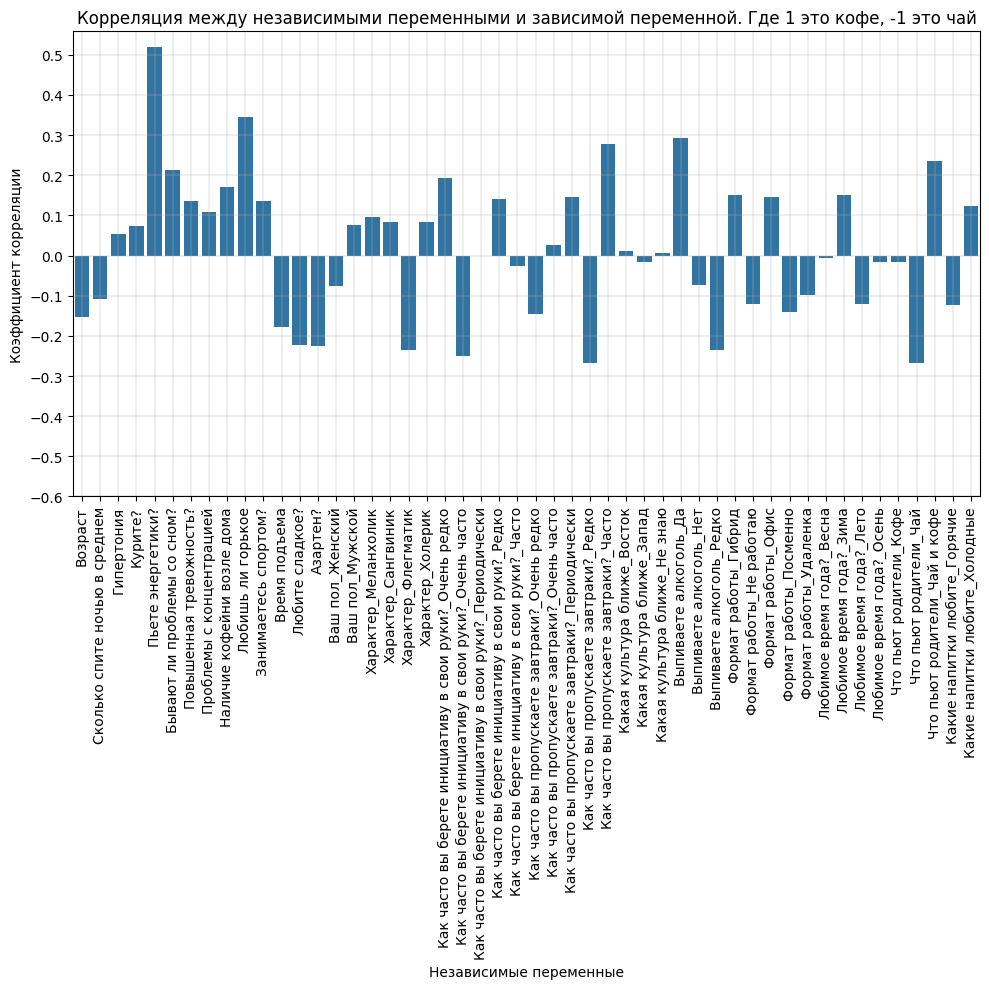

In [117]:
correlations = df.corr()[target_feature].drop(target_feature)

plt.figure(figsize=(10, 10))
sns.barplot(x=correlations.index, y=correlations.values)

plt.title('Корреляция между независимыми переменными и зависимой переменной. Где 1 это кофе, -1 это чай')
plt.xlabel('Независимые переменные')
plt.ylabel('Коэффициент корреляции')
plt.xticks(rotation=90)
# plt.ylim(-0.6, 0.6)
plt.yticks(np.arange(-0.6, 0.6, 0.1))
plt.grid(True, linewidth=0.3)
plt.tight_layout()

plt.show()